In [230]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

from knn import KNN

In [231]:
female_data = pd.read_csv("ANSUR_II_FEMALE_Public.csv")
female_data.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,...,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,...,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,...,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,...,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,...,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right hand


In [232]:
male_data = pd.read_csv("ANSUR_II_MALE_Public.csv", encoding="latin_1")
male_data.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [233]:
data = pd.concat([female_data , male_data])
data

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,subjectid
0,10037.0,231,1282,301,204,1180,222,177,373,315,...,92Y,Germany,2,NaN,2,26,61,142,Right hand,NaN
1,10038.0,194,1379,320,207,1292,225,178,372,272,...,25U,California,3,Mexican,3,21,64,120,Right hand,NaN
2,10042.0,183,1369,329,233,1271,237,196,397,300,...,35D,Texas,1,NaN,1,23,68,147,Right hand,NaN
3,10043.0,261,1356,306,214,1250,240,188,384,364,...,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand,NaN
4,10051.0,309,1303,308,214,1210,217,182,378,320,...,42A,Texas,1,NaN,1,45,63,195,Right hand,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,NaN,235,1353,312,216,1263,228,193,384,318,...,11B,Colorado,51,Blackfoot Cherokee Choctaw,1,22,67,160,Right hand,29442.0
4078,NaN,247,1473,336,234,1346,253,196,428,374,...,91B,Oklahoma,1,NaN,1,22,71,194,Right hand,29443.0
4079,NaN,264,1394,313,227,1280,245,193,407,367,...,13B,Oklahoma,1,NaN,1,23,67,186,Right hand,29447.0
4080,NaN,203,1417,327,223,1314,250,196,419,365,...,13P,Oklahoma,1,NaN,1,22,69,165,Right hand,29451.0


In [234]:
data["weightkg"] = data["weightkg"] / 10 #convert to kg

data["stature"] = data['stature'] / 10 #convert to cm

data["Gender"]= data["Gender"].replace(["Female" , "Male"] , [0,1]) #convert to binary

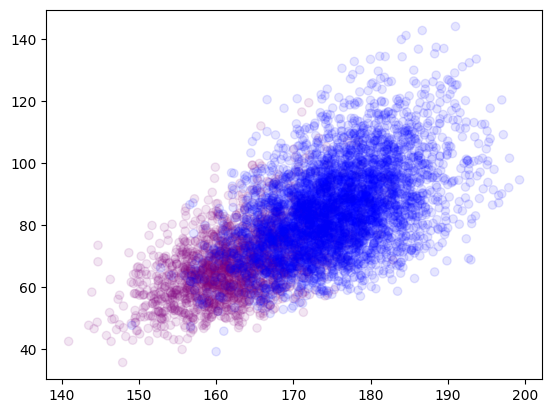

In [235]:
cmap = ["purple" , "blue"]
plt.scatter(data["stature"] , data["weightkg"] , c=data["Gender"] , cmap=ListedColormap(cmap) , alpha=0.1)
plt.show()

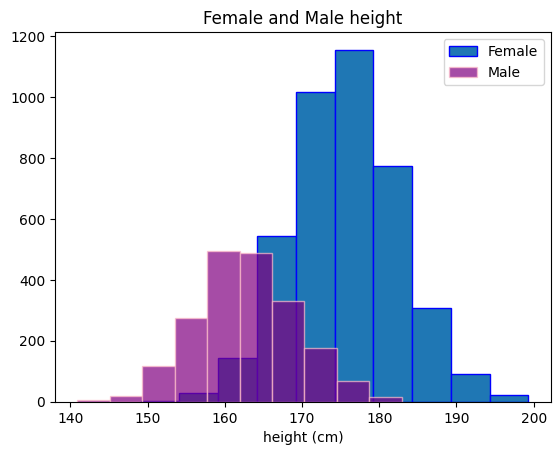

In [236]:
Female_height = data.query("Gender == 0")["stature"]
Male_height = data.query("Gender == 1")["stature"]

plt.hist(Male_height , edgecolor="blue" )
plt.hist(Female_height , color="purple" , edgecolor="pink"  , alpha=0.7)
plt.title("Female and Male height")
plt.legend(["Female" , "Male"])
plt.xlabel("height (cm)")
plt.show()

Why is the data of men higher than the data of women?

✨Standard deviation is a number that describes how spread out the values are.

A low standard deviation means that most of the numbers are close to the mean (average) value.
A high standard deviation means that the values are spread out over a wider range.

standard deviation_Male > standard deviation_Female
count of Male > count of Female

So, it can be said that according to the standard deviation, men's height is more than women's, and according to the average value, men's height is 175 cm more than women's height is 162 cm, and the number of men is more than women, and it seems that all These were effective


In [237]:
var_Female_height = data.query("Gender == 0")["stature"].var()
var_Female_height

41.215773730978306

In [238]:
var_male_height = data.query("Gender == 1")["stature"].var()
var_male_height

46.99210490026738

In [239]:

std_Female= np.std(Female_height)

print(std_Female)

6.418334719535899


In [240]:
std_male= np.std(Male_height)

print(std_male)

6.854239043880034


In [241]:
count_Female = data.query("Gender == 0")["stature"].count()
count_Female

1986

In [242]:
count_male = data.query("Gender == 1")["stature"].count()
count_male

4082

‌B. Why is the data of men more right than the data of women?


 ✨because the mean of men's height is greater than mean of women's height

In [243]:
var_Female_height = data.query("Gender == 0")["stature"].mean()
var_Female_height

162.84733131923463

In [244]:
var_male_height = data.query("Gender == 1")["stature"].mean()
var_male_height

175.62146006859385

Split dataset to train and test datasets (%80 for train and %20 for test):

you can’t evaluate the predictive performance of a model with the same data you used for training. You need evaluate the model with fresh data that hasn’t been seen by the model before. You can accomplish that by splitting your dataset before you use it.

In [245]:
def generate_datasets() :
    weight= data["weightkg"].to_numpy()
    height=data["stature"].to_numpy()
    X = data[["weightkg","stature"]].to_numpy()
    Y = data['Gender'].to_numpy()
    return X,Y

X,Y

(array([[ 65.7, 156. ],
        [ 53.4, 166.5],
        [ 66.3, 171.1],
        ...,
        [ 83.2, 169. ],
        [ 73.1, 171.8],
        [ 98.5, 182.8]]),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64))

In [246]:
x_train , x_test , y_train ,y_test = train_test_split(X,Y,test_size= 0.2 ,random_state=30 ,stratify=Y)
x_train , y_train


(array([[ 78.5, 179.2],
        [ 95.3, 174.9],
        [ 63.9, 165.9],
        ...,
        [ 59.7, 158.7],
        [ 88.4, 168.3],
        [ 85.1, 173.9]]),
 array([1, 0, 1, ..., 0, 1, 1], dtype=int64))

In [247]:
x_test ,y_test

(array([[ 89.6, 183.1],
        [ 50.1, 152.9],
        [ 85.3, 183.5],
        ...,
        [ 66.2, 164.5],
        [ 96.6, 175.1],
        [ 79.4, 177.8]]),
 array([1, 0, 1, ..., 0, 1, 1], dtype=int64))

In [248]:
knn = KNN(k=3)
knn.fit(x_train ,y_train)

In [249]:
new_person1=np.array([70.5,180])
new_person2=np.array([55,150])
new_person3=np.array([63,158])
new_person4=np.array([92.6,200])
new_person5=np.array([88,175])

new_persons=[new_person1,new_person2,new_person3,new_person4,new_person5]
outputs= knn.predict(new_persons)


In [250]:
for output in outputs :
    if output == 0:
        print("🙍🏽‍♀️")
    else:
        print("🙍🏽‍♂️")

🙍🏽‍♂️
🙍🏽‍♀️
🙍🏽‍♀️
🙍🏽‍♂️
🙍🏽‍♂️


In [251]:
knn.evaluate(x_test , y_test)

0.8204283360790774

In [252]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train ,y_train)

knn.predict(new_persons)

array([1, 0, 0, 1, 1], dtype=int64)

In [253]:
knn.score(x_test,y_test)

0.8187808896210873

In [254]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics 

In [255]:
y_pred =knn.predict(x_test)
confusion_matrix = np.zeros((2,2))

for i in range(len(x_test)):
    if y_test[i]==0 and y_pred[i]==0 :
        confusion_matrix[0][0] += 1

    elif y_test[i]==0 and y_pred[i]==1 :
        confusion_matrix[1][0] += 1

    elif y_test[i]==1 and y_pred[i]==0 :
        confusion_matrix[0][1] += 1
        
    elif y_test[i]==1 and y_pred[i]==1 :
        confusion_matrix[1][1] += 1

confusion_matrix  

array([[273.,  96.],
       [124., 721.]])

In [256]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [257]:
confusion_matrix = metrics.confusion_matrix(y_test ,y_pred)


In [258]:
ConfusionMatrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix= confusion_matrix , display_labels=[0 ,1])

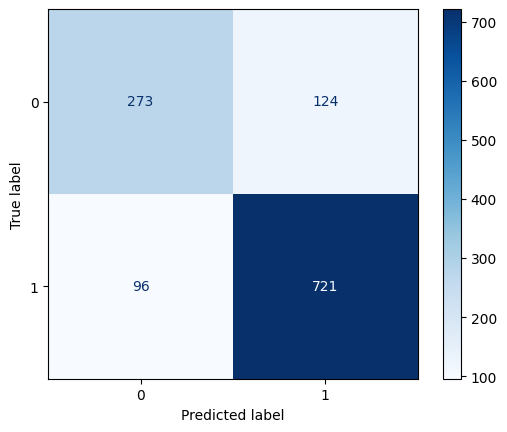

In [259]:
ConfusionMatrix_display.plot(cmap=plt.cm.Blues)
plt.show()

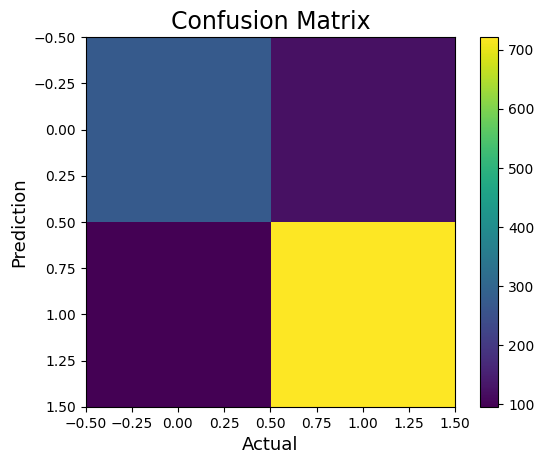

In [261]:
plt.imshow(confusion_matrix)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.colorbar()
plt.show()